# Sentence Correction using Recurrent Neural Networks



---



## Overview

Social media always dictates its own rules. Acronyms and abbreviations, for example, have become part of the unique language spoken on social platform. If you’ve been observing social media conversations, you might have come across a ton of lingo or acronyms that take you a while to figure out. Social media acronyms like TFW, TBH and LMK get thrown around very casually in comments, captions and conversations between people.
Whether the language is spoken or written, natural language processing uses artificial intelligence to take real-world input, process it, and make sense of it in a way a computer can understand. NLP enables computers to understand natural language as humans do. But before it can be utilized by any AI based system it needs to be converted in a clean format. Data preprocessing involves preparing and cleaning text data for machines to be able to analyze it. Preprocessing puts data in workable form and highlights features in the text that an algorithm can work with. 

Recent development in deep learning and in particular to natural language processing has motivated researchers to apply sentence correction techniques in solving challenging problems like machine translation, automatic grammar checking, etc. In this project, we address the problem of English sentence correction using encoder-decoder based sequence-to-sequence recurrent neural network with long short term memory cells.

## Business Problem

This project act as a sub module of large text data based project where the objective is to create a system to convert raw wild text to standard English text while preserving the semantic meaning of text.


## Problem Statement: A Deep Learning Perspective

This project aims to create a preprocessing method for converting raw text containing possible errors or
wild characters/internet acronyms/texting abbreviations/messaging shorthands to standard English format
clean text. Our system objective is to convert the corrupted input sentence to target sentence with the goal
of the output being to preserve the latent properties of the input text (sentiment, named entities, etc.) but
mutated in a way that embeds these properties in a representation familiar to other Natural Language
Processing systems.  
Literature Survey reveals that related works have been done in this area using various mechanisms,
ranging from rule-based models to stochastic models. Hidden Markov Models have been shown to exhibit
a strong ability to capture many of the high-level dynamics of the natural English language; however, such
models break down while modeling crucial long-range dependencies. On the other hand, Recurrent Neural
Networks and LSTM are more adept at capturing these long-range dynamics. Therefore, in our work, we
turn to the recent success of neural networks in the field of Natural Language Processing for model
inspiration.

**Performance Metrics:**

Performance are measured on cross-entropy as loss function, given by:

![loss](https://drive.google.com/uc?export=view&id=1xy0tWA9QYV262lyfp9CT43lm37m1Pd5N)

## Dataset Details

**Dataset 1: [NUS Social Media Text Normalization and Translation Corpus](https://www.comp.nus.edu.sg/~nlp/corpora.html)**  

A detailed review of related literature led to an English corpus of 2000 texts from the National University of Singapore.
The corpus is created for social media text normalization and translation. It is built by randomly selecting 2,000 messages from the NUS English SMS corpus. The messages were first normalized into formal English and then translated into formal Chinese.  
From our review, it seems that this is the only publicly available normalized corpus for texts.

This dataset contains social media text along with their normalized text and Chinese translation of the normalized text. For our problem we need only social media text and their normalized English text.

**Dataset 2: [NAIST Lang-8 Learner Corpora](https://sites.google.com/site/naistlang8corpora/)**

This corpus contains English learners texts extracted from Lang-8. It has 100,051 English entries written by 29,012 active users and it include automatic tense/aspect annotation.

### Sample Dataset 1

![rnn](https://drive.google.com/uc?export=view&id=17ushFeyWhN5RqobigZ0JpZ-_e7gUr36_)



---



# Table of Contents

*   [1. Exploratory Data Analysis](#section1)
  *   [1.1. Input Text Visualization](#section1.1)
      *   [1.1.1. Character Level](#section1.1.1)
      *   [1.1.2. Word Level](#section1.1.2)
      *   [1.1.3. Word Cloud](#section1.1.3)
      *   [1.1.4. POS Tag Counts](#section1.1.4)

  *   [1.2. Output Text Visualization](#section1.2)
      *   [1.2.1. Character Level](#section1.2.1)
      *   [1.2.2. Word Level](#section1.2.2)
      *   [1.2.3. Word Cloud](#section1.2.3)
      *   [1.2.4. POS Tag Counts](#section1.2.4)

  *   [1.3. Identifying Outliers](#section1.3)
      *   [1.3.1. Character Level](#section1.3.1)
      *   [1.3.2. Word Level](#section1.3.2)




---



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.utils import shuffle
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Loading Datasets

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/AAIC Assgn/28.Case Study 2/2.Datasets/'

In [ ]:
'''This function is used to extract raw data from file.'''
def extract_data_1(file_name):
    files = open(file_name, 'r')
    lines = files.readlines()
    files.close()
    input_text = []
    output_text = []
    data = pd.DataFrame()

    for idx,line in enumerate(lines):
        if idx%3 == 0:
           input_text.append(line.strip())
        elif idx%3 == 1:
            output_text.append(line.strip())
        else:
            pass

    data['input_text'] = input_text
    data['output_text'] = output_text
    return data

def extract_data_2(file_name):
    files = open(file_name, 'r')
    lines = files.readlines()
    files.close()
    input_text = []
    output_text = []
    data = pd.DataFrame()

    for idx,line in enumerate(lines):
        line = line.strip()
        line = line.split('\t')
        if line[0] == '1' or line[0] == '2':
            input_text.append(line[4])
            output_text.append(line[5])

    data['input_text'] = input_text
    data['output_text'] = output_text
    return data

In [ ]:
data_1 = extract_data_1(data_path + 'en2cn-2k.en2nen2cn')
data_1.to_csv(data_path + 'Data_1.csv', index=False)

In [ ]:
data_2 = extract_data_2(data_path + 'entries.train')
data_2.to_csv(data_path + 'Data_2.csv', index=False)

In [ ]:
data_1 = pd.read_csv(data_path + 'Data_1.csv')
data_2 = pd.read_csv(data_path + 'Data_2.csv', nrows=100000)

In [ ]:
# printing the shape of dataset
print('Shape of dataset 1:', data_1.shape)
print('Shape of dataset 2:', data_2.shape)

Shape of dataset 1: (2000, 2)
Shape of dataset 2: (100000, 2)


In [ ]:
# printing few rows
data_1.head()

,input_text,output_text
0,"U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


In [ ]:
# printing few rows
data_2.head()

,input_text,output_text
0,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
1,"Actually , who let me know about Lang - 8 was ...","Actually , he was the one who let me know abou..."
2,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
3,"We 've known each other for only half a year ,...","We 've known each other for only half a year ,..."
4,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watch...


In [ ]:
# merging and shuffling the datasets
data = pd.concat([data_1, data_2])
data = shuffle(data, random_state=33)
data.shape

(102000, 2)

In [ ]:
data.head()

,input_text,output_text
78195,"Ofcouse , I love cheap fashion , fast fashion ...","Of course , I love cheap , fast fashion like f..."
22180,If he want to listen to music that I do n't li...,If he wants to listen to music that I do n't l...
26548,This happened because of the cultural differen...,This happened because of the cultural differen...
45816,I 'm gon na earn much money to study abroad .,I 'm gon na earn enough money to study abroad .
33832,It is not difficult for me but answer phones a...,It is not difficult for me but answering the p...


In [ ]:
# printing the basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102000 entries, 78195 to 21572
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   input_text   102000 non-null  object
 1   output_text  102000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
# checking missing values
print('Total missing values:')
data.isnull().sum()

Total missing values:


input_text     0
output_text    0
dtype: int64

In [ ]:
# checking duplicate rows
print('Total duplicate rows:', data.duplicated().sum())

Total duplicate rows: 165


In [ ]:
# removing duplicate rows
data.drop_duplicates(inplace=True)
print('Total rows after removing duplicate rows:', data.shape[0])

Total rows after removing duplicate rows: 101835


<a name='section1'><a/>
# 1. Exploratory Data Analysis

<a name='section1.1'><a/>
## 1.1. Input Text Visualization

<a name='section1.1.1'><a/>
### 1.1.1. Character Level

Number of characters in each Input Text

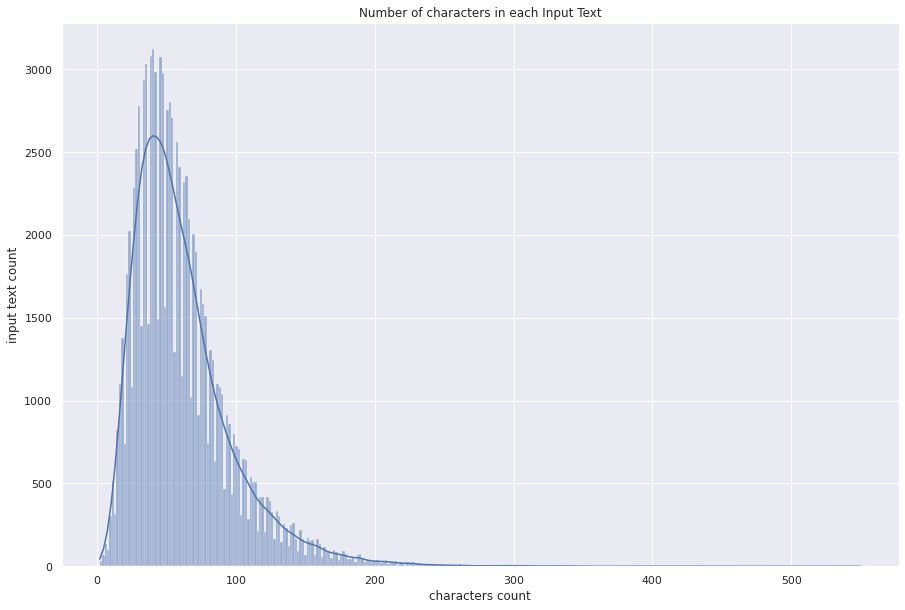

In [ ]:
input_text_char_length = data['input_text'].str.len() 

plt.figure(figsize=(15,10))
sns.histplot(input_text_char_length, kde=True)
plt.title("Number of characters in each Input Text")
plt.xlabel('characters count')
plt.ylabel('input text count')
plt.show()

In [ ]:
print('Maximum length of characters in Input Text:', input_text_char_length.max())
print('Mean length of characters in Input Text:', input_text_char_length.mean())
print('Minimum length of characters in Input Text:', input_text_char_length.min())

Maximum length of characters in Input Text: 550
Mean length of characters in Input Text: 61.80412431875092
Minimum length of characters in Input Text: 2


Percentile values of characters count in each Input Text

In [ ]:
# Printing percentile values between 0 to 100 with step size 10
for i in range(0,101,10):
  print('{} th percentile is {}'.format(i, np.percentile(input_text_char_length, i)))

0 th percentile is 2.0
10 th percentile is 25.0
20 th percentile is 33.0
30 th percentile is 40.0
40 th percentile is 47.0
50 th percentile is 54.0
60 th percentile is 62.0
70 th percentile is 71.0
80 th percentile is 85.0
90 th percentile is 108.0
100 th percentile is 550.0


In [ ]:
# Printing the percentile values between 90 to 100 with step size 1
for i in range(90,101):
    print('{} th percentile is {}'.format(i, np.percentile(input_text_char_length, i)))

90 th percentile is 108.0
91 th percentile is 112.0
92 th percentile is 116.0
93 th percentile is 120.0
94 th percentile is 125.0
95 th percentile is 132.0
96 th percentile is 140.0
97 th percentile is 149.0
98 th percentile is 163.0
99 th percentile is 189.0
100 th percentile is 550.0


In [ ]:
# Printing the percentile values between 99 and 100
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} th percentile is {}'.format(i, np.percentile(input_text_char_length, i)))

99.1 th percentile is 192.0
99.2 th percentile is 197.0
99.3 th percentile is 202.0
99.4 th percentile is 208.0
99.5 th percentile is 215.0
99.6 th percentile is 225.0
99.7 th percentile is 237.0
99.8 th percentile is 260.0
99.9 th percentile is 302.0
100 th percentile is 550.0


**Observation(s):**

* Input Text at Character Level:
  * Maximum length of characters in Input Text: 550
  * Mean length of characters in Input Text: 61
  * Minimum length of characters in Input Text: 2
  * Majority of the text is of 25 to 200 characters (including spaces).
  * A very small portion of text have character length greater than 302.
  * 90th percentile is 108 whereas 100th percentile is 550. There is huge difference.
  * 99th percentile is 189 whereas 100th percentile is 550.
  * The 99.8th percentile  is 260, whereas 99.9th percentile is 302. There is huge difference. So maximum length for input text could be considered as 260.




<a name='section1.1.2'><a/>
### 1.1.2. Word Level

Number of words in each Input Text

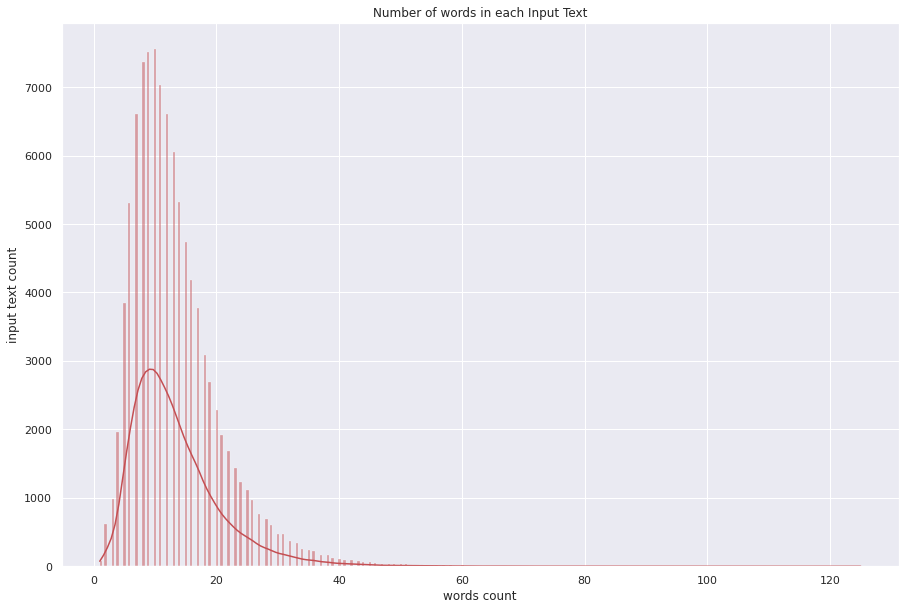

In [ ]:
input_text_word_length = data['input_text'].str.split().str.len()

plt.figure(figsize=(15,10))
sns.histplot(input_text_word_length, kde=True, color='r')
plt.title("Number of words in each Input Text")
plt.xlabel('words count')
plt.ylabel('input text count')
plt.show()

In [ ]:
print('Maximum length words in Input Text:', input_text_word_length.max())
print('Mean length of words in Input Text:', input_text_word_length.mean())
print('Minimum length of words in Input Text:', input_text_word_length.min())

Maximum length words in Input Text: 125
Mean length of words in Input Text: 13.44418912947415
Minimum length of words in Input Text: 1


Percentile values of words count in each Input Text

In [ ]:
# Printing percentile values between 0 to 100 with step size 10
for i in range(0,101,10):
    print('{} th percentile is {}'.format(i, np.percentile(input_text_word_length, i)))

0 th percentile is 1.0
10 th percentile is 6.0
20 th percentile is 8.0
30 th percentile is 9.0
40 th percentile is 10.0
50 th percentile is 12.0
60 th percentile is 13.0
70 th percentile is 15.0
80 th percentile is 18.0
90 th percentile is 23.0
100 th percentile is 125.0


In [ ]:
# Printing the percentile values between 90 to 100 with step size 1
for i in range(90,101):
    print('{} th percentile is {}'.format(i, np.percentile(input_text_word_length, i)))

90 th percentile is 23.0
91 th percentile is 24.0
92 th percentile is 24.0
93 th percentile is 25.0
94 th percentile is 26.0
95 th percentile is 28.0
96 th percentile is 29.0
97 th percentile is 31.0
98 th percentile is 34.0
99 th percentile is 39.0
100 th percentile is 125.0


In [ ]:
# Printing the percentile values between 99 and 100
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} th percentile is {}'.format(i, np.percentile(input_text_word_length, i)))

99.1 th percentile is 40.0
99.2 th percentile is 41.0
99.3 th percentile is 42.0
99.4 th percentile is 43.0
99.5 th percentile is 45.0
99.6 th percentile is 47.0
99.7 th percentile is 50.0
99.8 th percentile is 54.0
99.9 th percentile is 63.0
100 th percentile is 125.0


**Observation(s):**

* Input Text at Word Level:
  * Maximum length words in Input Text: 125
  * Mean length of words in Input Text: 13
  * Minimum length of words in Input Text: 1
  * Majority of the text is of 10 to 50 words.
  * A very small portion of text have words more than 60.
  * 90th percentile is 23, whereas 100th percentile is 125 There is huge difference.
  * 99th percentile is 39 whereas 100th percentile is 125.
  * The 99.9th percentile is 63, whereas 100th percentile is 125. There is huge difference. So maximum word for input text could be considered as 63.




<a name='section1.1.3'><a/>
### 1.1.3. Word Cloud

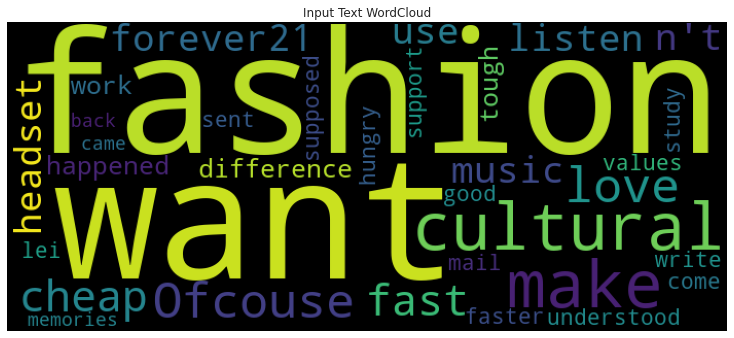

In [ ]:
# word cloud of common words
text = data['input_text'].values

wordcloud = WordCloud(width=700, height=300, background_color='black', stopwords=STOPWORDS)
wordcloud = wordcloud.generate(str(text))

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Input Text WordCloud")
plt.show()

<a name='section1.1.4'><a/>
### 1.1.4. POS Tag Counts

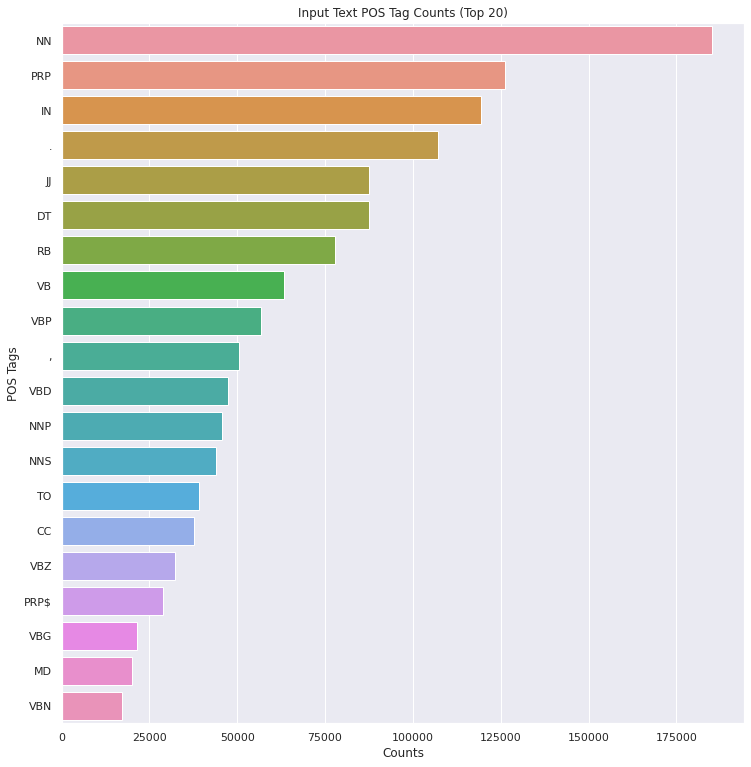

In [ ]:
# ref: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = data['input_text'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)
x,y = list(map(list,zip(*counter.most_common(20))))

plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.tight_layout(pad=0)
plt.title('Input Text POS Tag Counts (Top 20)')
plt.xlabel('Counts')
plt.ylabel('POS Tags')
plt.show()

<a name='section1.2'><a/>
## 1.2. Output Text Visualization

<a name='section1.2.1'><a/>
### 1.2.1. Character Level

Number of characters in each Output Text

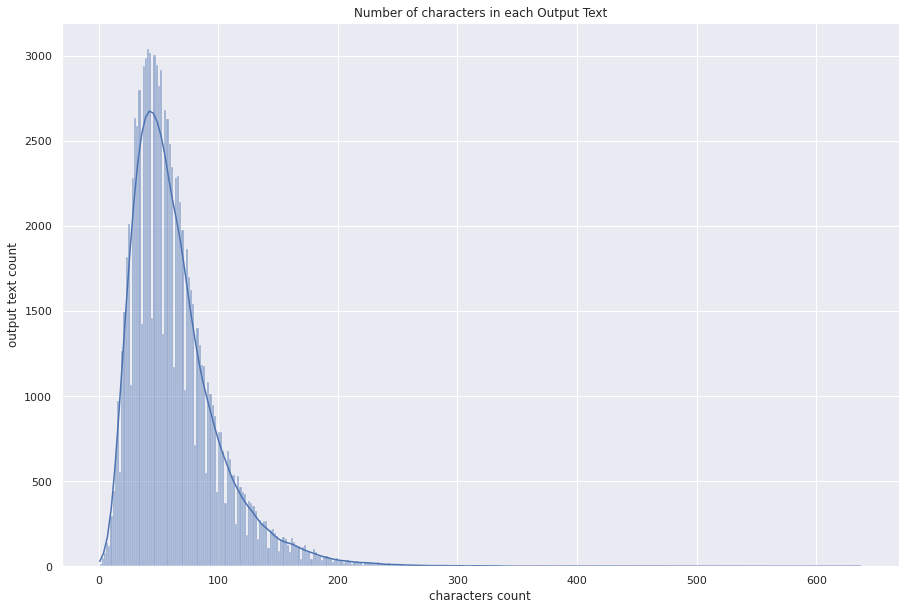

In [ ]:
output_text_char_length = data['output_text'].str.len() 

plt.figure(figsize=(15,10))
sns.histplot(output_text_char_length, kde=True)
plt.title("Number of characters in each Output Text")
plt.xlabel('characters count')
plt.ylabel('output text count')
plt.show()

In [ ]:
print('Maximum length of characters in Output Text:', output_text_char_length.max())
print('Mean length of characters in Output Text:', output_text_char_length.mean())
print('Minimum length of characters in Output Text:', output_text_char_length.min())

Maximum length of characters in Output Text: 637
Mean length of characters in Output Text: 64.01623214022683
Minimum length of characters in Output Text: 1


Percentile values of characters count in each Output Text

In [ ]:
# Printing percentile values between 0 to 100 with step size 10
for i in range(0,101,10):
    print('{} th percentile is {}'.format(i, np.percentile(output_text_char_length, i)))

0 th percentile is 1.0
10 th percentile is 27.0
20 th percentile is 35.0
30 th percentile is 42.0
40 th percentile is 49.0
50 th percentile is 56.0
60 th percentile is 64.0
70 th percentile is 74.0
80 th percentile is 87.0
90 th percentile is 111.0
100 th percentile is 637.0


In [ ]:
# Printing the percentile values between 90 to 100 with step size 1
for i in range(90,101):
    print('{} th percentile is {}'.format(i, np.percentile(output_text_char_length, i)))

90 th percentile is 111.0
91 th percentile is 115.0
92 th percentile is 119.0
93 th percentile is 123.0
94 th percentile is 129.0
95 th percentile is 135.0
96 th percentile is 143.0
97 th percentile is 154.0
98 th percentile is 168.0
99 th percentile is 192.0
100 th percentile is 637.0


In [ ]:
# Printing the percentile values between 99 and 100
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} th percentile is {}'.format(i, np.percentile(output_text_char_length, i)))

99.1 th percentile is 196.0
99.2 th percentile is 200.0
99.3 th percentile is 206.0
99.4 th percentile is 212.0
99.5 th percentile is 220.0
99.6 th percentile is 229.0
99.7 th percentile is 242.0
99.8 th percentile is 262.0
99.9 th percentile is 303.0
100 th percentile is 637.0


**Observation(s):**

* Output Text at Character Level:
  * Maximum length of characters in Output Text: 637
  * Mean length of characters in Output Text: 64
  * Minimum length of characters in Output Text: 1
  * Majority of the text is of 27 to 250 characters (including spaces).
  * A very small portion of text have character length greater than 262.
  * 90th percentile is 111 whereas 100th percentile is 637. There is huge difference.
  * 99th percentile is 193 whereas 100th percentile is 637.
  * 99.8th percentile is 262 while 99.9th percentile is 303. Very few sentences have length more than 262. So maximum length for output text could be considered as 260.




<a name='section1.2.2'><a/>
### 1.2.2. Word Level

Number of words in each Output Text

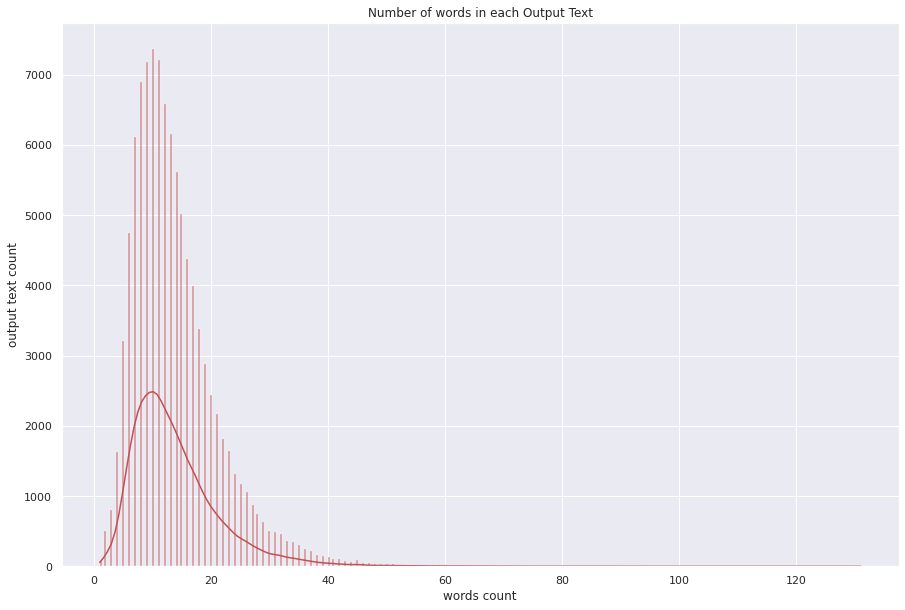

In [ ]:
output_text_word_length = data['output_text'].str.split().str.len()

plt.figure(figsize=(15,10))
sns.histplot(output_text_word_length, kde=True, color='r')
plt.title("Number of words in each Output Text")
plt.xlabel('words count')
plt.ylabel('output text count')
plt.show()

In [ ]:
print('Maximum length words in Output Text:', output_text_word_length.max())
print('Mean length of words in Output Text:', output_text_word_length.mean())
print('Minimum length of words in Output Text:', output_text_word_length.min())

Maximum length words in Output Text: 131
Mean length of words in Output Text: 13.93664260814062
Minimum length of words in Output Text: 1


Percentile values of words count in each Output Text

In [ ]:
# Printing percentile values between 0 to 100 with step size 10
for i in range(0,101,10):
    print('{} th percentile is {}'.format(i, np.percentile(output_text_word_length, i)))

0 th percentile is 1.0
10 th percentile is 6.0
20 th percentile is 8.0
30 th percentile is 9.0
40 th percentile is 11.0
50 th percentile is 12.0
60 th percentile is 14.0
70 th percentile is 16.0
80 th percentile is 19.0
90 th percentile is 23.0
100 th percentile is 131.0


In [ ]:
# Printing the percentile values between 90 to 100 with step size 1
for i in range(90,101):
    print('{} th percentile is {}'.format(i, np.percentile(output_text_word_length, i)))

90 th percentile is 23.0
91 th percentile is 24.0
92 th percentile is 25.0
93 th percentile is 26.0
94 th percentile is 27.0
95 th percentile is 28.0
96 th percentile is 30.0
97 th percentile is 32.0
98 th percentile is 35.0
99 th percentile is 40.0
100 th percentile is 131.0


In [ ]:
# Printing the percentile values between 99 and 100
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} th percentile is {}'.format(i, np.percentile(output_text_word_length, i)))

99.1 th percentile is 41.0
99.2 th percentile is 42.0
99.3 th percentile is 43.0
99.4 th percentile is 44.0
99.5 th percentile is 46.0
99.6 th percentile is 48.0
99.7 th percentile is 51.0
99.8 th percentile is 55.0
99.9 th percentile is 63.0
100 th percentile is 131.0


**Observation(s):**

* Output Text at Word Level:
  * Maximum length words in Output Text: 131
  * Mean length of words in Output Text: 13
  * Minimum length of words in Output Text: 1
  * Majority of the text is of 10 to 50 words.
  * A very small portion of text have character length greater than 50.
  * 90th percentile is 23 whereas 100th percentile is 131. There is huge difference.
  * 99th percentile is 40 whereas 100th percentile is 131.
  * The 99.9th percentile  is 63, whereas 100th percentile is 131. So maximum word for output text could be considered as 63.




<a name='section1.2.3'><a/>
### 1.2.3. Word Cloud

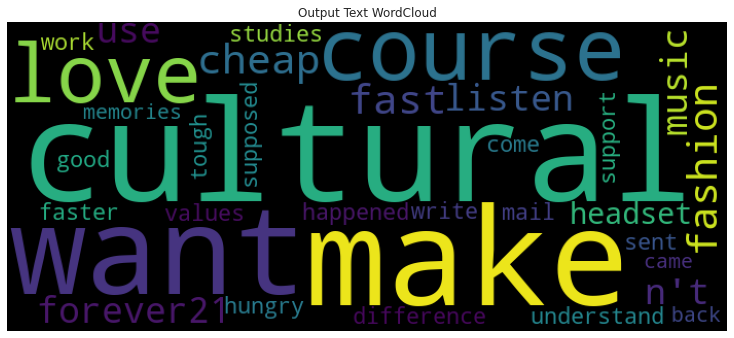

In [ ]:
# word cloud of common words
text = data['output_text'].values

wordcloud = WordCloud(width=700, height=300, background_color='black', stopwords=STOPWORDS)
wordcloud = wordcloud.generate(str(text))

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Output Text WordCloud")
plt.show()

<a name='section1.2.4'><a/>
### 1.2.4. POS Tag Counts

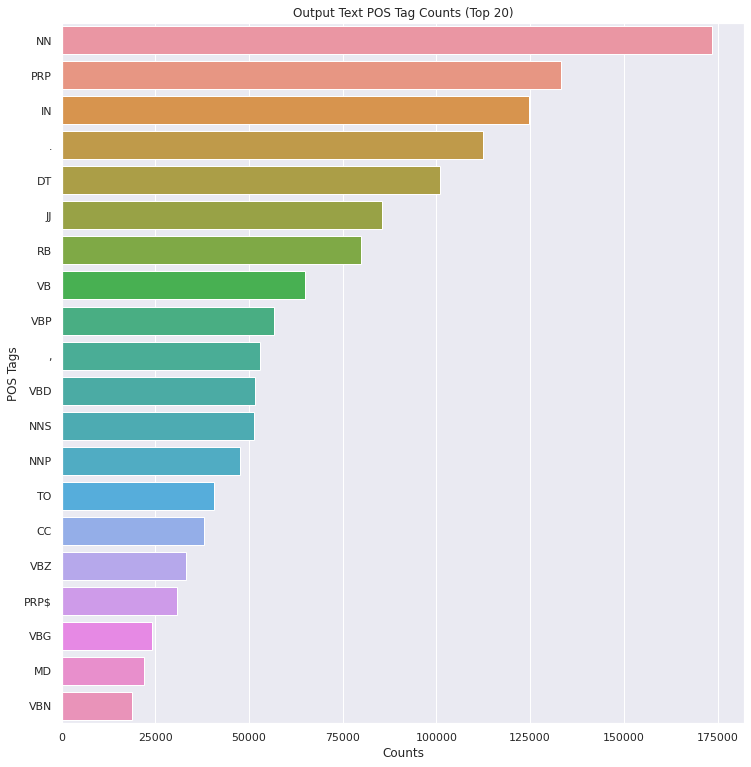

In [ ]:
def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = data['output_text'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)
x,y = list(map(list,zip(*counter.most_common(20))))

plt.figure(figsize=(10,10))
sns.barplot(x=y,y=x)
plt.tight_layout(pad=0)
plt.title('Output Text POS Tag Counts (Top 20)')
plt.xlabel('Counts')
plt.ylabel('POS Tags')
plt.show()

<a name='section1.3'><a/>
## 1.3. Identifying Outliers

<a name='section1.3.1'><a/>
### 1.3.1. Character Level

In [ ]:
rows = data.loc[(data['input_text'].str.len() == 1) | (data['output_text'].str.len() == 1)].shape[0]
print('Total # rows with just 1 character (input or output text):', rows)

Total # rows with just 1 character (input or output text): 9


In [ ]:
data.loc[(data['input_text'].str.len() == 1) | (data['output_text'].str.len() == 1)]

,input_text,output_text
6096,- -,-
35221,"Maiko Nakai ,",","
43195,At first .,.
10532,took some medicine .,.
30496,you .,.
81291,to near park .,.
35222,Hello .,.
9833,daily life .,.
91774,Do ours best !,!


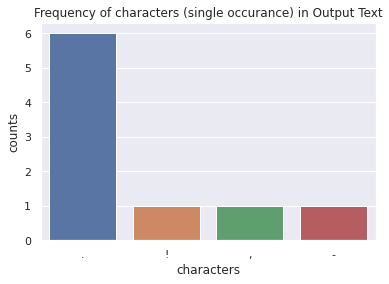

In [ ]:
rows = data['output_text'].loc[data['output_text'].str.len() == 1].value_counts()
sns.barplot(x=rows.index, y=rows.values)
plt.title('Frequency of characters (single occurance) in Output Text')
plt.ylabel('counts', fontsize=12)
plt.xlabel('characters', fontsize=12)
plt.show()

In [ ]:
data.drop(data.loc[(data['input_text'].str.len() == 1) | (data['output_text'].str.len() == 1)].index, inplace=True)
data.shape

(101826, 2)

Observation(s):

*   Few sentences have minimum character of just 1 and counts of such characters is less than 3. Such points can be considered as an outliers and can be removed.



<a name='section1.3.2'><a/>
### 1.3.2. Word Level

In [ ]:
rows = data.loc[(data['input_text'].str.split().str.len() == 1) | (data['output_text'].str.split().str.len() == 1)].shape[0]
print('Total # rows with just 1 word (input or output text):', rows)

Total # rows with just 1 word (input or output text): 90


In [ ]:
data.loc[(data['input_text'].str.split().str.len() == 1) | (data['output_text'].str.split().str.len() == 1)]

,input_text,output_text
39649,CM,TV Commercial * CM is Japanese English .
23717,Kindle,The Kindle
1494,go,Go.
41022,library,The library
1917,230,230
...,...,...
427,yup..,Yes.
39969,haaa,haaa ( ? )
1492,hi,Hi.
21261,etc,etc .


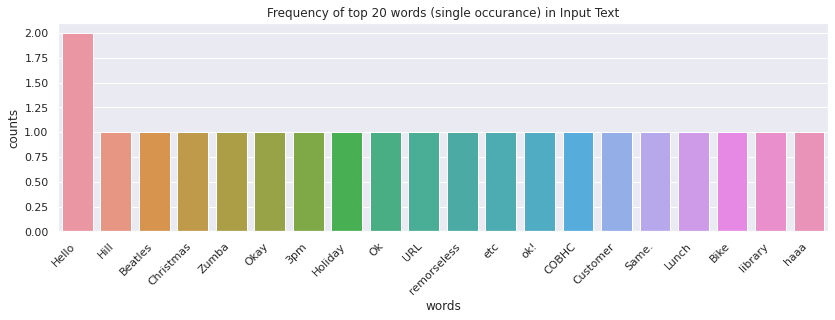

In [ ]:
rows = data['input_text'].loc[data['input_text'].str.split().str.len() == 1].value_counts()
rows = rows[:20]

plt.figure(figsize=(12,4))
sns.barplot(x=rows.index, y=rows.values)
plt.tight_layout(pad=3)
plt.title('Frequency of top 20 words (single occurance) in Input Text')
plt.ylabel('counts', fontsize=12)
plt.xlabel('words', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

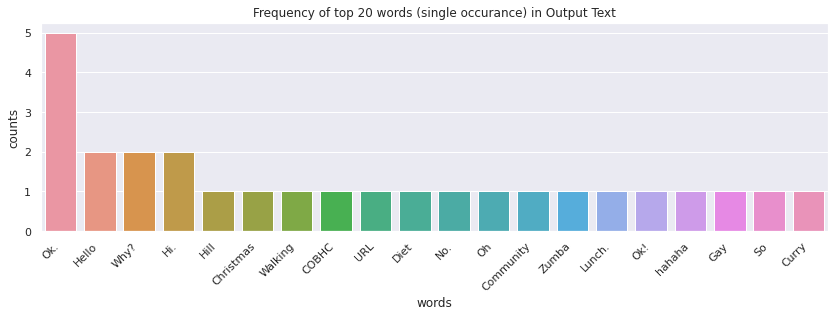

In [ ]:
rows = data['output_text'].loc[data['output_text'].str.split().str.len() == 1].value_counts()
rows = rows[:20]

plt.figure(figsize=(12,4))
sns.barplot(x=rows.index, y=rows.values)
plt.tight_layout(pad=3)
plt.title('Frequency of top 20 words (single occurance) in Output Text')
plt.ylabel('counts', fontsize=12)
plt.xlabel('words', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
data.drop(data.loc[(data['input_text'].str.split().str.len() == 1) | (data['output_text'].str.split().str.len() == 1)].index, inplace=True)
data.shape

(101717, 2)

Observation(s):

*   Few sentences have minimum word of just 1 and counts of many such words is also just 1. Such points can be considered as an outliers and can be removed.

In [ ]:
# saving final dataset
data.to_csv(data_path + 'final_data.csv', index=False)